In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
iris = pd.read_csv("datasets/iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

iris : 150 individus, iris_dna : 146 individus


<Figure size 1117.75x1000 with 20 Axes>

In [2]:
#separation des Données : echantillon par especes
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [3]:
#Q1 : coefficients de corrélation linéaires sur dataframe iris_dna
# petal_width en fonction de petal_length
# sepal_width en fonction de petal_width

import scipy.stats as st

# coefficient de Pearson (correlation  lineaire) ; attention detecte seulement corrélation lineaire
# si pearson proche de 0 : pas corrélé; si pearson proche de 1 : corrélé; si proche de -1 : correlation inverse
print("coefficients de corrélation linéaires petal_width:f(petal_length) =",
      st.pearsonr(iris_dna["petal_width"],iris_dna["petal_length"])[0])
print("coefficients de corrélation linéaires sepal_width:f(petal_width) =",
      st.pearsonr(iris_dna["sepal_width"],iris_dna["petal_width"])[0])

# Recherche de correlation sepal_width en fonction de petal_width PAR TYPE
print("iris_setosa : coefficients de corrélation linéaires sepal_width:f(petal_width) =",
      st.pearsonr(iris_setosa["sepal_width"],iris_setosa["petal_width"])[0])
print("iris_virginica : coefficients de corrélation linéaires sepal_width:f(petal_width) =",
      st.pearsonr(iris_virginica["sepal_width"],iris_virginica["petal_width"])[0])
print("iris_versicolor : coefficients de corrélation linéaires sepal_width:f(petal_width) =",
      st.pearsonr(iris_versicolor["sepal_width"],iris_versicolor["petal_width"])[0])

coefficients de corrélation linéaires petal_width:f(petal_length) = 0.9418817573025173
coefficients de corrélation linéaires sepal_width:f(petal_width) = -0.24797130615784596
iris_setosa : coefficients de corrélation linéaires sepal_width:f(petal_width) = 0.7531349595699938
iris_virginica : coefficients de corrélation linéaires sepal_width:f(petal_width) = 0.6850773581335284
iris_versicolor : coefficients de corrélation linéaires sepal_width:f(petal_width) = 0.8250525564073545


iris_dna, Modele d'estimation petal_length = f(petal_width) : Y =  2.2983278548876185 X +  -0.7472054882303134


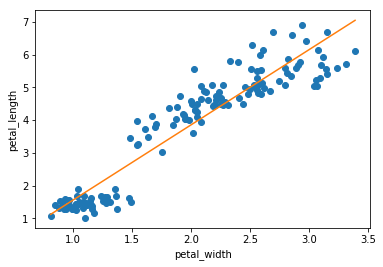

In [4]:
#Q3 Réalisez 4 régressions linéaires (avec la méthode des moindres carrés).
# Nous utiliserons la notation suivante : Y = aX + b + epsilon .
# a et b sont les réels que vous devez estimer, epsilon le terme d'erreur (vous n'avez pas à vous en soucier),
#X et Y sont 2 variables.

import statsmodels.api as sm
import numpy as np
#cas 1/ X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dna
curData = iris_dna

Y = curData['petal_length'] # variable à predire (1 seule colonne :serie)
X = curData[['petal_width']] # variables de determination ( potentiellement plusieurs, donc [[]] : dataframe)
X = X.copy() # On modifiera X, on en crée donc une copie

X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']
print("iris_dna, Modele d'estimation petal_length = f(petal_width) : Y = ",a,"X + ",b) # estimation OLS  linear parameter : Y = aX+b

#graphique 
valrange = [curData['petal_width'].min(),curData['petal_width'].max()] #cherche 2valeur extreme pour tracé
plt.plot(curData.petal_width,curData.petal_length, "o") #definition nuage de points
plt.plot(valrange,[a*x+b for x in valrange])

plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

#Sauvegarde de coef
Ato =a
Bto =b

iris_setosa, Modele d'estimation petal_length = f(petal_width) : Y =  0.40212853547748884 X +  1.0159490596875849


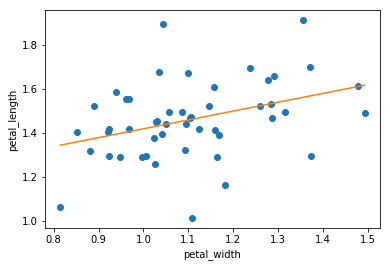

iris_virginica, Modele d'estimation petal_length = f(petal_width) : Y =  0.6289083251485394 X +  3.8058425496311514


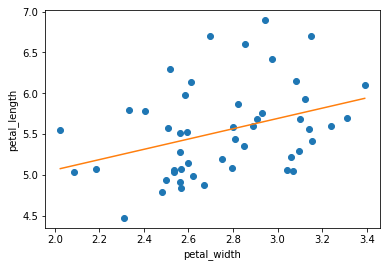

iris_versicolor, Modele d'estimation petal_length = f(petal_width) : Y =  1.4454550026119877 X +  1.353513190083881


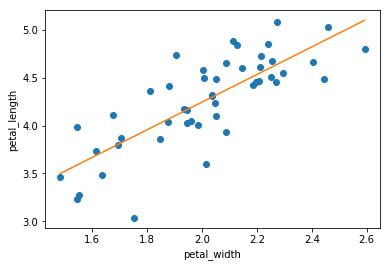

In [5]:
#cas 2/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa
curData = iris_setosa

Y = curData['petal_length'] # variable à predire (1 seule colonne :serie)
X = curData[['petal_width']] # variables de determination ( potentiellement plusieurs, donc [[]] : dataframe)
X = X.copy() # On modifiera X, on en crée donc une copie

X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']
print("iris_setosa, Modele d'estimation petal_length = f(petal_width) : Y = ",a,"X + ",b) # estimation OLS  linear parameter : Y = aX+b

#graphique 
valrange = [curData['petal_width'].min(),curData['petal_width'].max()] #cherche 2valeur extreme pour tracé
plt.plot(curData.petal_width,curData.petal_length, "o") #definition nuage de points
plt.plot(valrange,[a*x+b for x in valrange])

plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

#Sauvegarde de coef
A1 =a
B1 =b
#---------------------------------------------------------------------------------------------------
#cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica
curData = iris_virginica

Y = curData['petal_length'] # variable à predire (1 seule colonne :serie)
X = curData[['petal_width']] # variables de determination ( potentiellement plusieurs, donc [[]] : dataframe)
X = X.copy() # On modifiera X, on en crée donc une copie

X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']
print("iris_virginica, Modele d'estimation petal_length = f(petal_width) : Y = ",a,"X + ",b) # estimation OLS  linear parameter : Y = aX+b

#graphique 
valrange = [curData['petal_width'].min(),curData['petal_width'].max()] #cherche 2valeur extreme pour tracé
plt.plot(curData.petal_width,curData.petal_length, "o") #definition nuage de points
plt.plot(valrange,[a*x+b for x in valrange])

plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

#Sauvegarde de coef
A2 =a
B2 =b
#---------------------------------------------------------------------------------------------------
#cas 4/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor
curData = iris_versicolor

Y = curData['petal_length'] # variable à predire (1 seule colonne :serie)
X = curData[['petal_width']] # variables de determination ( potentiellement plusieurs, donc [[]] : dataframe)
X = X.copy() # On modifiera X, on en crée donc une copie

X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']
print("iris_versicolor, Modele d'estimation petal_length = f(petal_width) : Y = ",a,"X + ",b) # estimation OLS  linear parameter : Y = aX+b

#graphique 
valrange = [curData['petal_width'].min(),curData['petal_width'].max()] #cherche 2valeur extreme pour tracé
plt.plot(curData.petal_width,curData.petal_length, "o") #definition nuage de points
plt.plot(valrange,[a*x+b for x in valrange])

plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

#Sauvegarde de coef
A3 =a
B3 =b

In [6]:
# Code qui remplace les valeurs manquantes dans le DATA set grâce aux régressions linéaires et en remplissant une approximation.
coeffs = {
    "cas 1" : {'a': Ato , 'b':Bto},
    "cas 2" : {'a': A1 , 'b':B1},
    "cas 3" : {'a': A2 , 'b':B2},
    "cas 4" : {'a': A3 , 'b':B3},
}
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        print(espece)
        Y = individu["petal_width"]
        if (espece == "iris_setosa") :
            casname = "cas 2"
        elif (espece == "iris_virginica") :
            casname = "cas 3"
        elif (espece == "iris_setosa") :
            casname = "cas 4"
        else:
            casname = "cas 1"
            
        a = coeffs[casname]['a']
        b = coeffs[casname]['b']
                  
        X = (Y-b)/a
        iris.loc[i,"petal_width"] = X # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(X,espece,Y))
        
print(iris.loc[lignes_modifiees])


setosa
On a complété sepal_width par 0.761226929457583 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 8.510086729759216 a partir de petal_length=4.027837977207209
versicolor
On a complété sepal_width par 1.3084120279519804 a partir de l'espece:versicolor et de petal_width=2.259954321281721
virginica
On a complété sepal_width par 1.7704514519840566 a partir de l'espece:virginica et de petal_width=3.3218723995908728
     sepal_length  sepal_width  petal_length  petal_width     species
3        4.603747          NaN      1.480616     0.761227      setosa
53       5.442775     2.340928      4.027838     8.510087  versicolor
61       5.879497          NaN      4.181942     1.308412  versicolor
100      6.230628          NaN      6.001908     1.770451   virginica
